In [1]:
import seaborn as sns
from tqdm import tqdm

In [2]:
import pandas as pd
from rpy2.robjects import r, pandas2ri
import numpy as np
import matplotlib.pyplot as plt

pandas2ri.activate()

r['load']("data/experiment2.rdata")

# Analysing object velocities (PASSIVE DATA)

In [3]:
from isaac.dataset import read_dataset

In [7]:
def basic_plotting(all_trials):
    OBJECTS = ["o1", "o2", "o3", "o4"]

    concat_trials = pd.concat(all_trials)
    
    for i, obj in enumerate(OBJECTS):
        concat_trials[[obj+".vx", obj+".vy"]].hist(bins=75, sharey=True, figsize=(15, 5))
        plt.show()
        concat_trials[[obj+".x", obj+".y"]].hist(bins=75, sharey=True, figsize=(15, 5))
        plt.show()
        concat_trials[[obj+".speed", obj+".angle"]].hist(bins=75, figsize=(15, 5))
        plt.show()
        
        distances = ["d_"+obj+"_"+obj_two for obj_two in OBJECTS[i+1:]]
        if distances:
            concat_trials[distances].hist(bins=75, figsize=(15, 5))

In [5]:
passive_trials = read_dataset("data/train_passive_trials.h5", n_trials=1000)

100%|██████████| 1000/1000 [00:10<00:00, 96.06it/s]


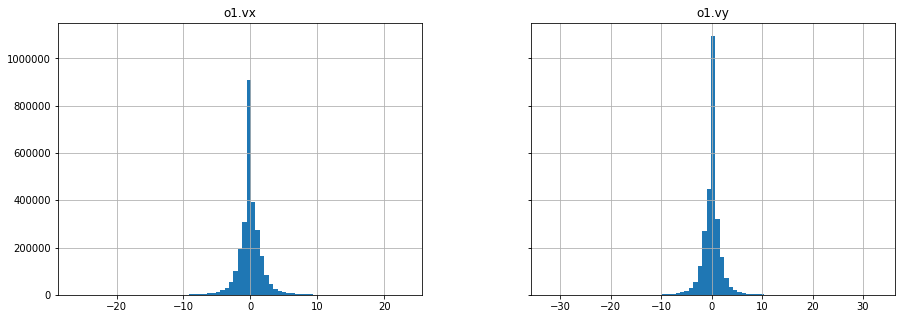

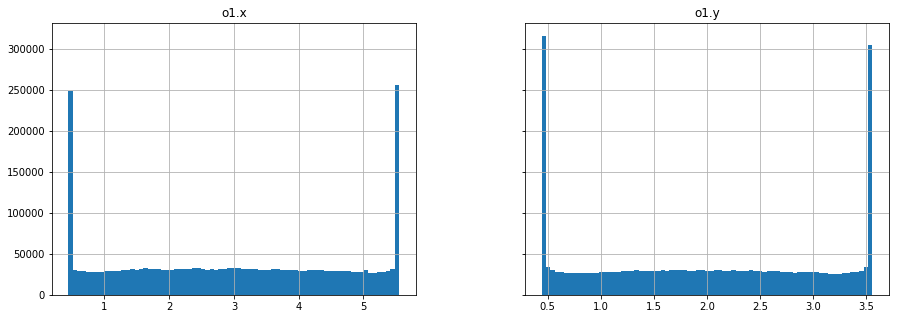

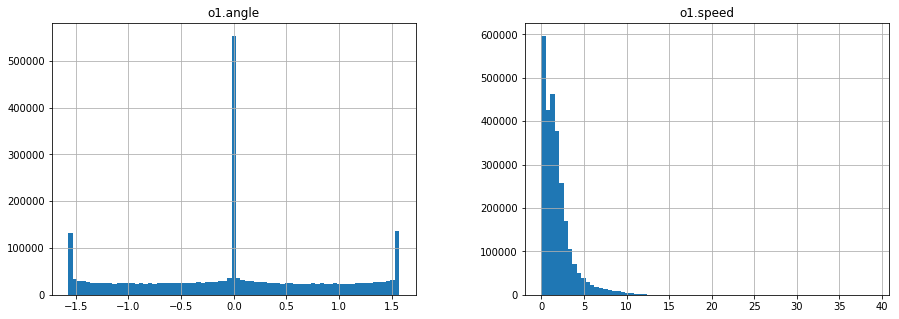

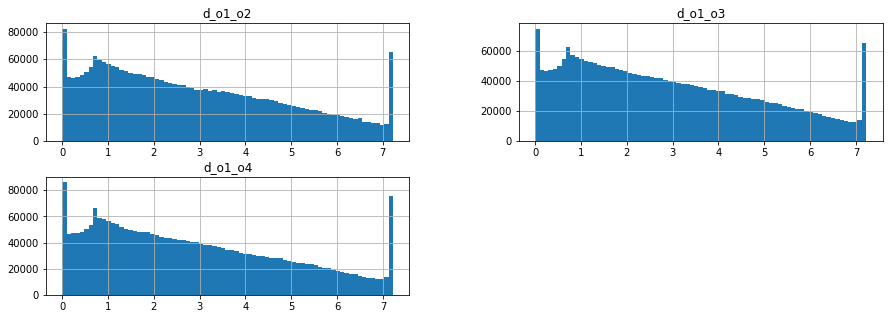

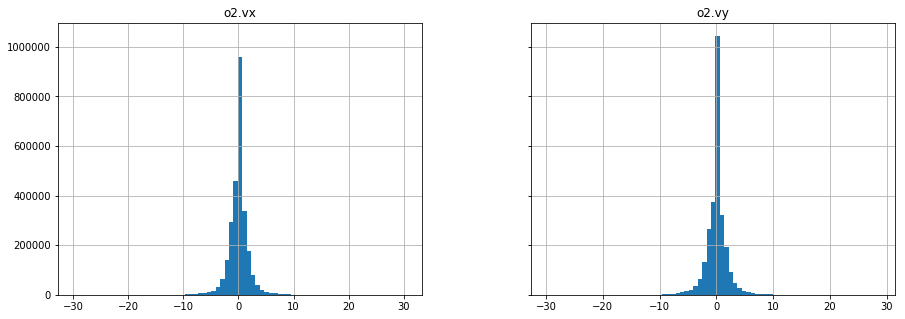

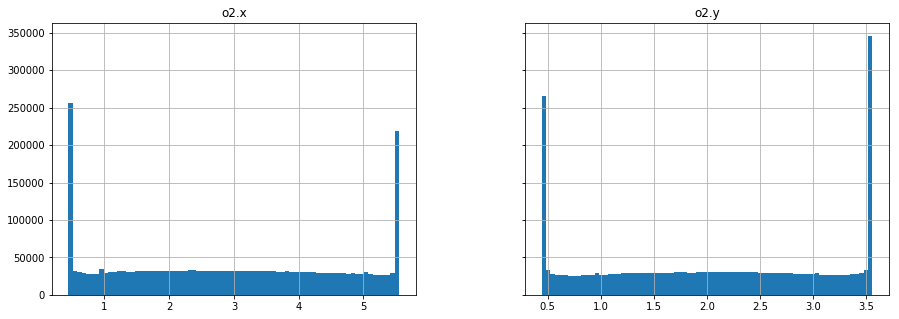

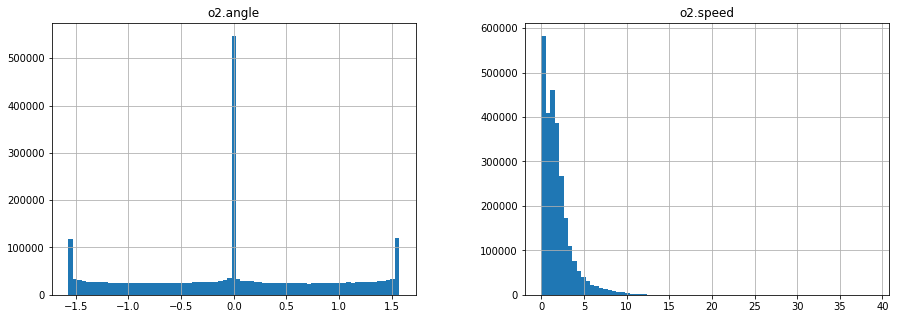

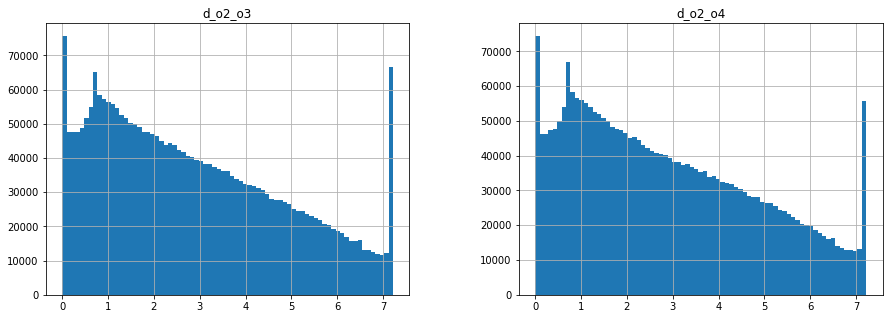

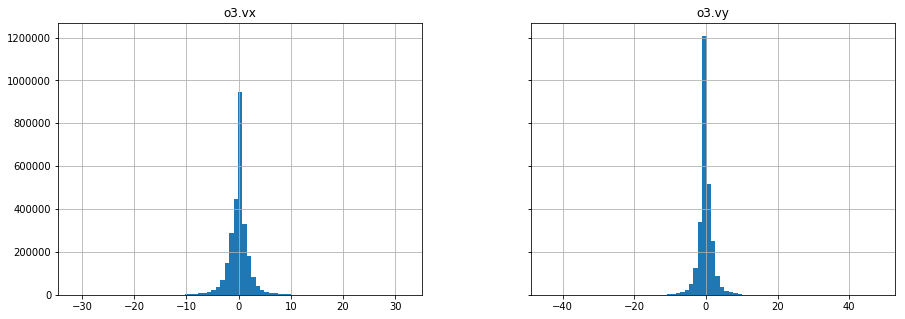

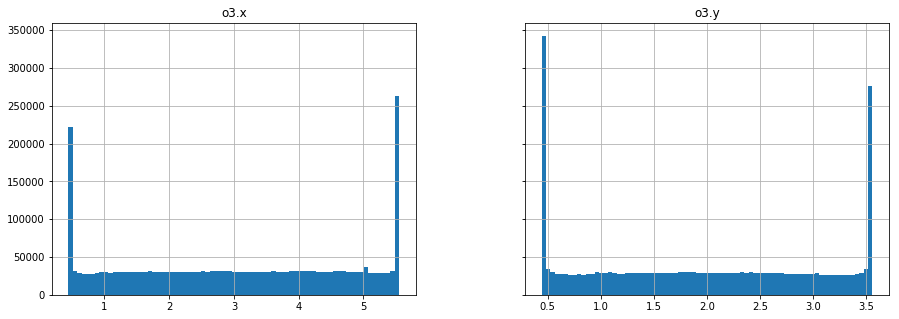

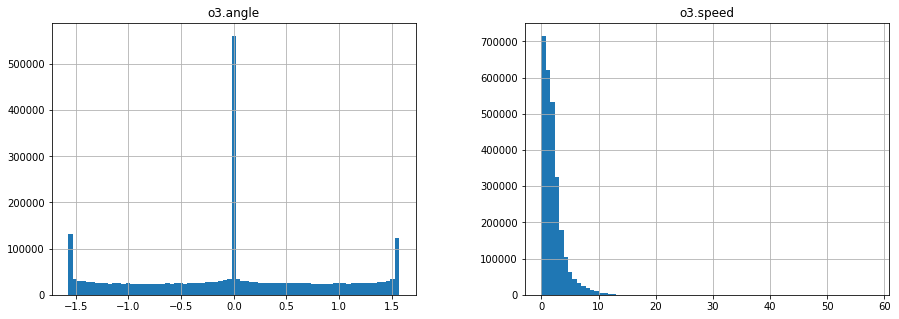

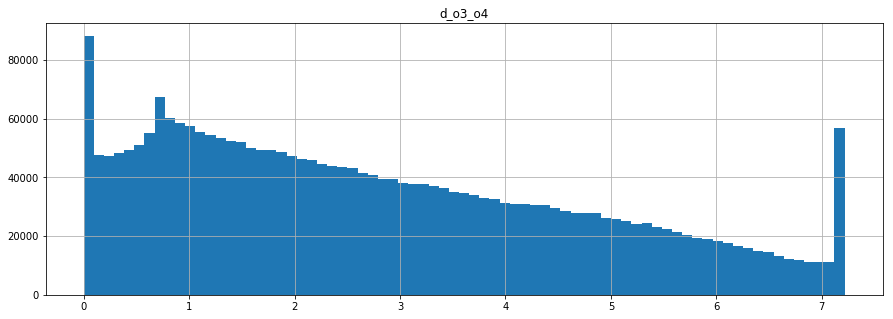

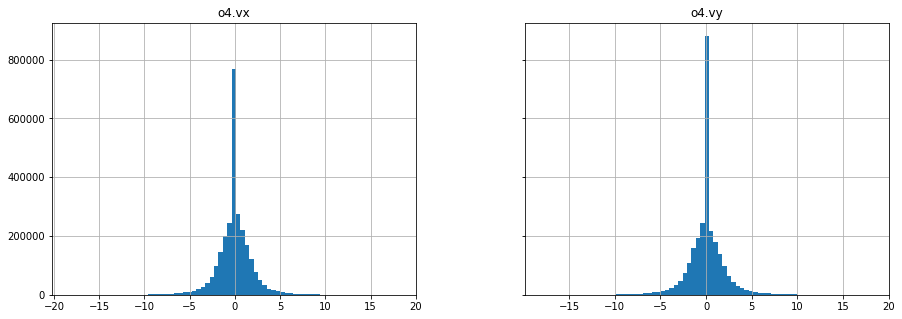

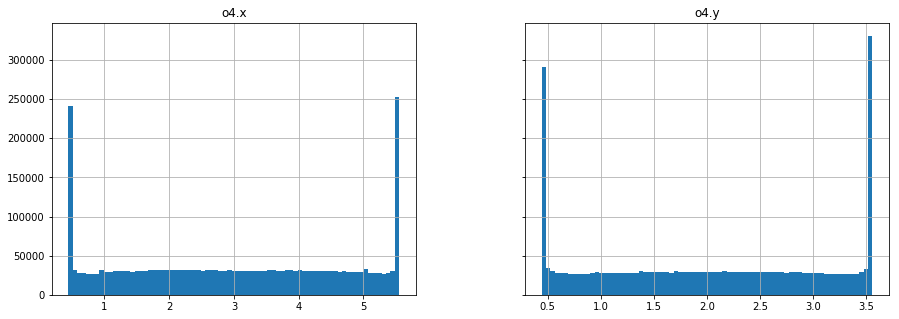

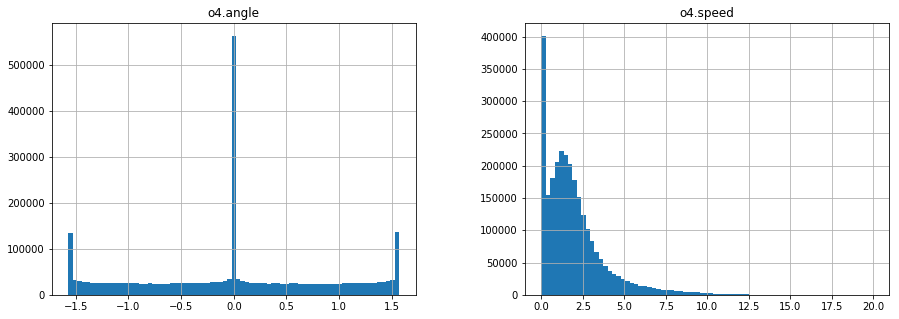

In [8]:
basic_plotting(passive_trials)

In [9]:
mass_trials = read_dataset("data/mass_trials_exp2.h5")
force_trials = read_dataset("data/force_trials_exp2.h5")

100%|██████████| 399/399 [00:09<00:00, 41.25it/s]


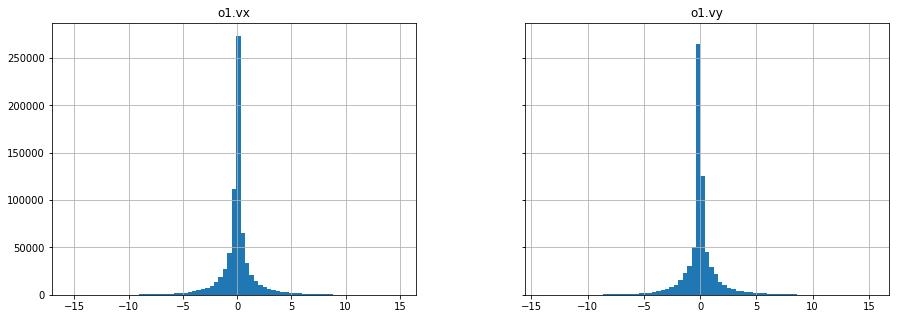

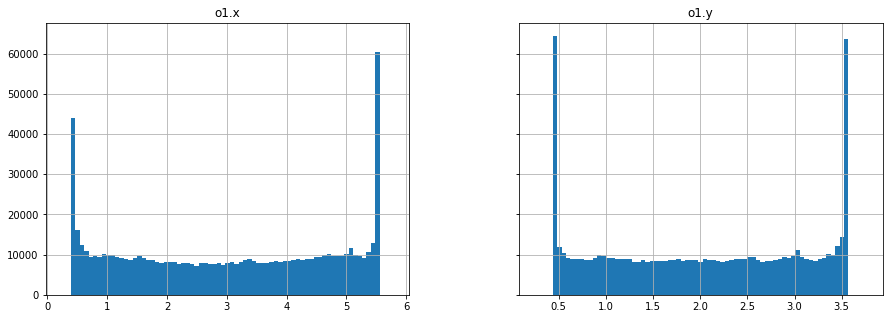

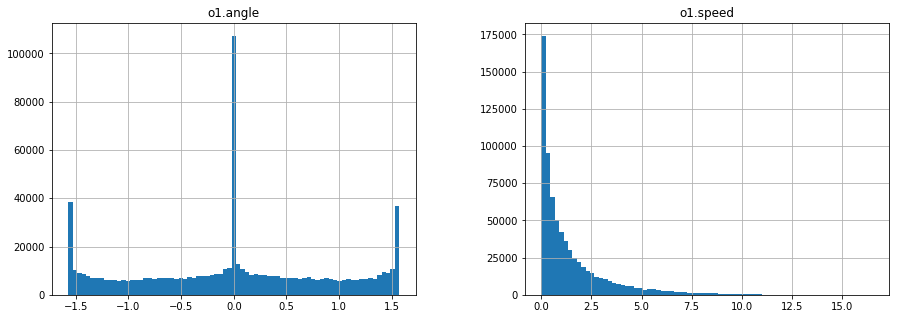

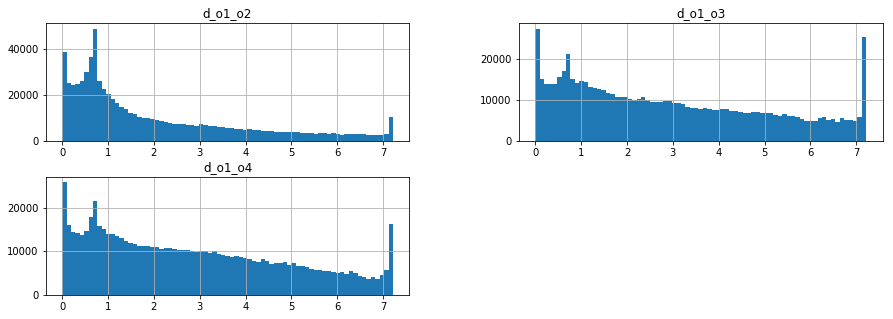

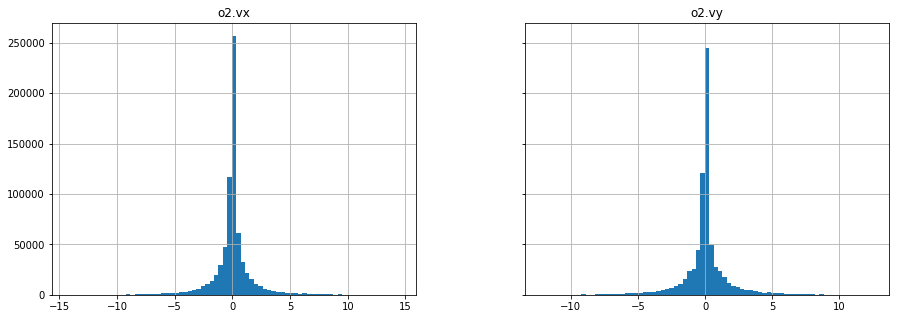

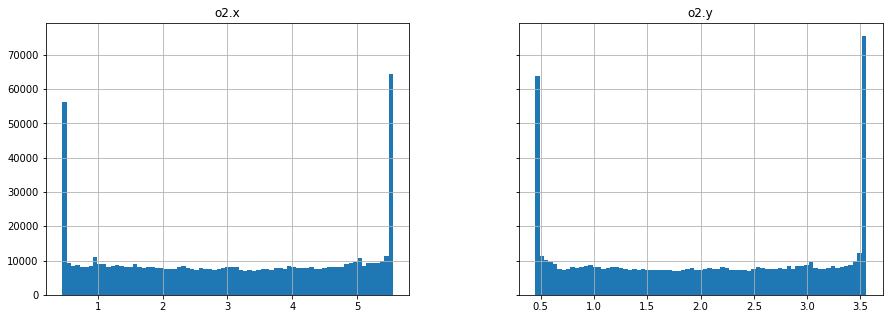

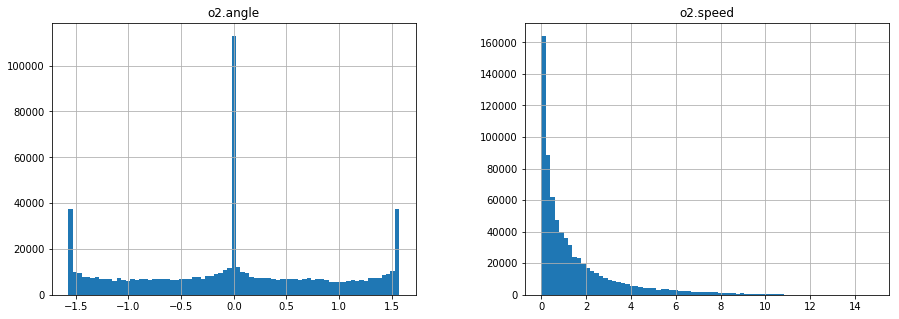

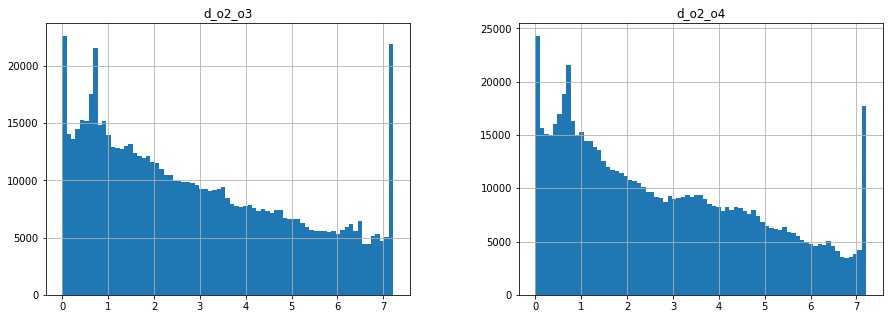

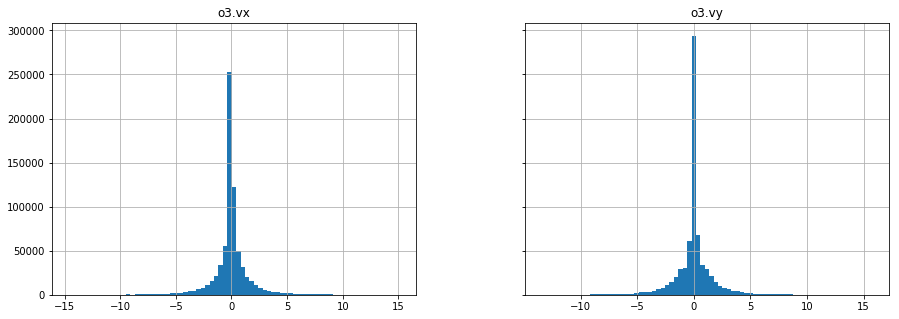

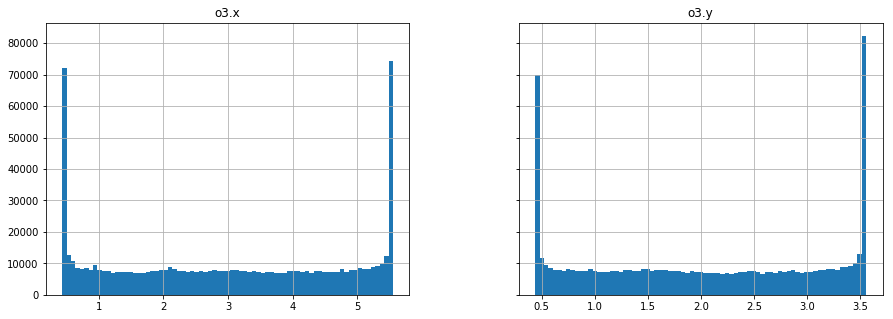

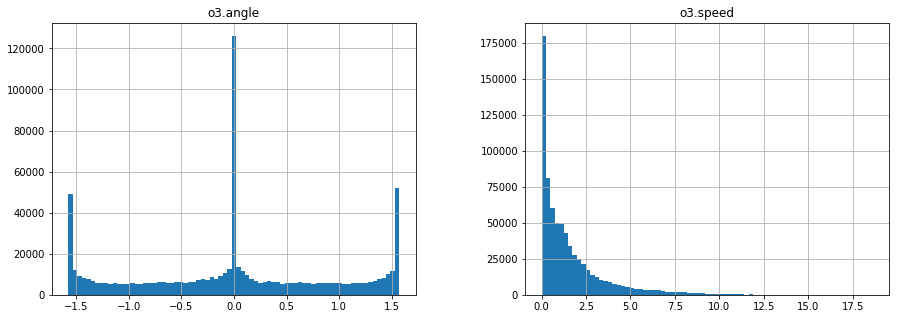

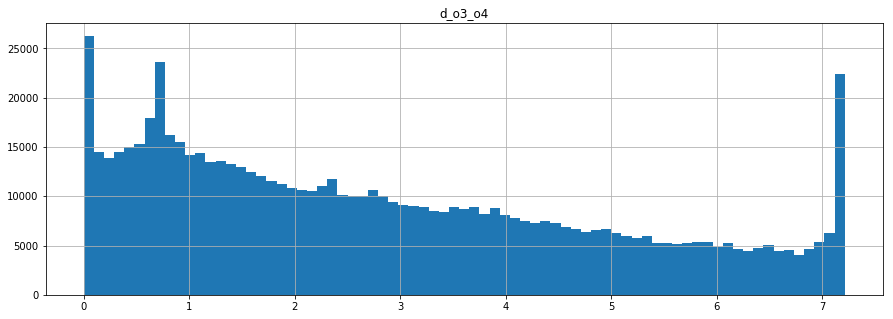

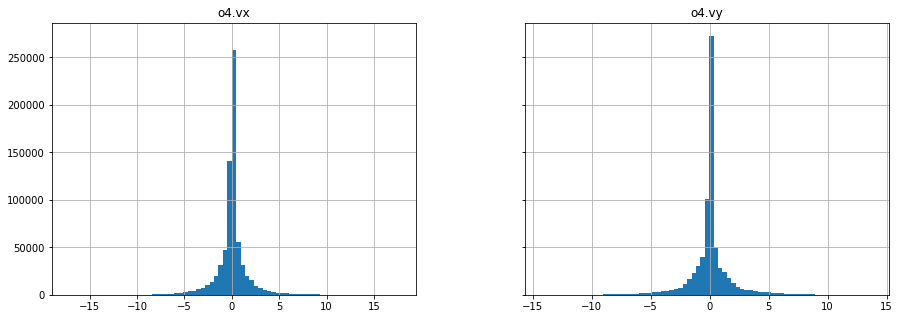

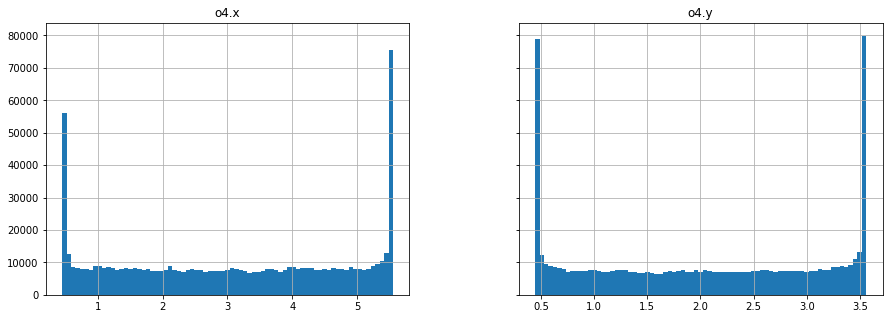

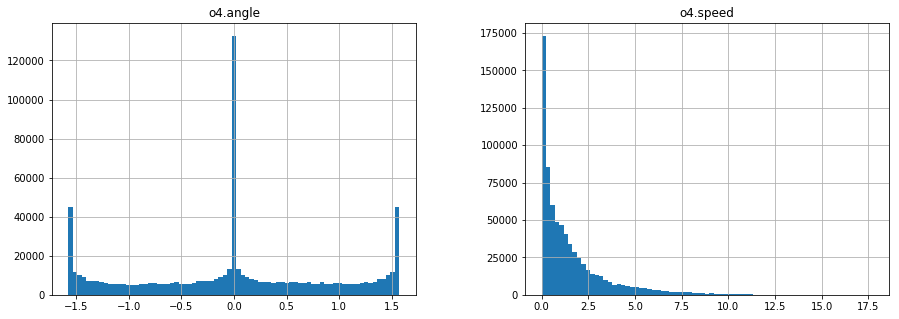

In [10]:
basic_plotting(force_trials)

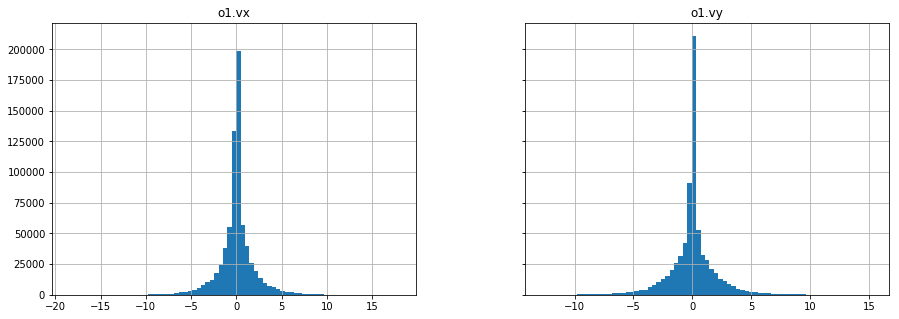

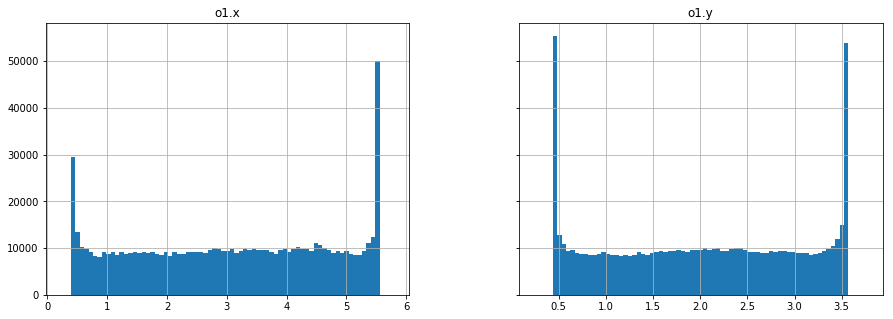

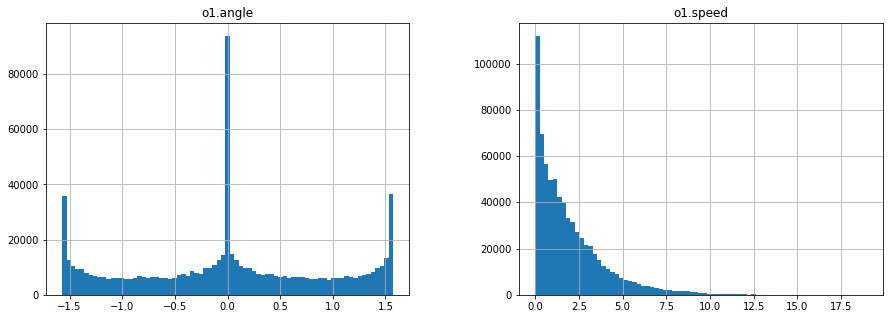

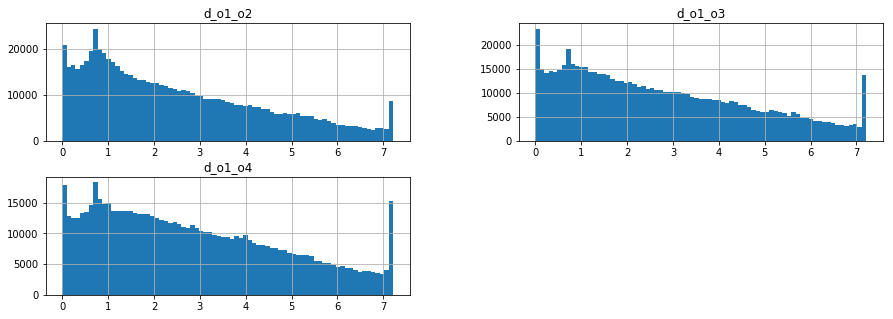

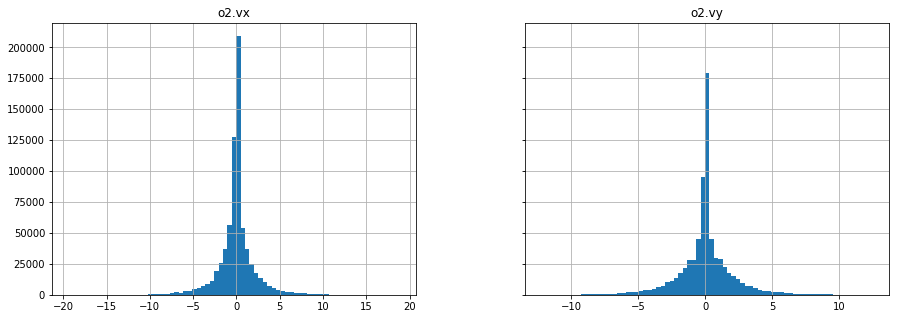

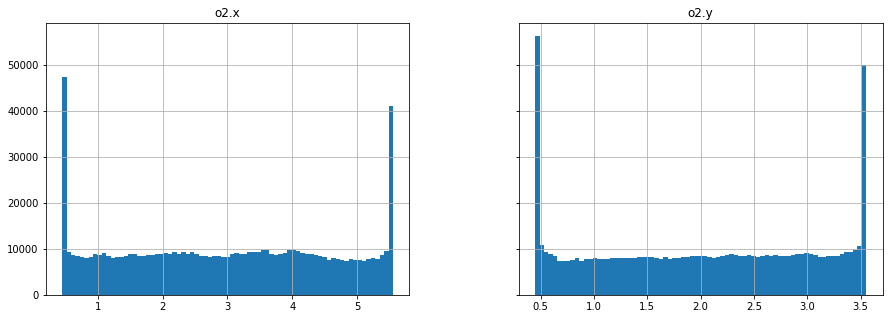

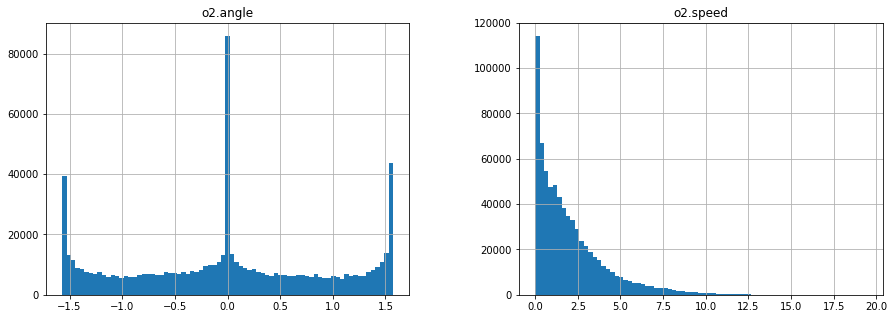

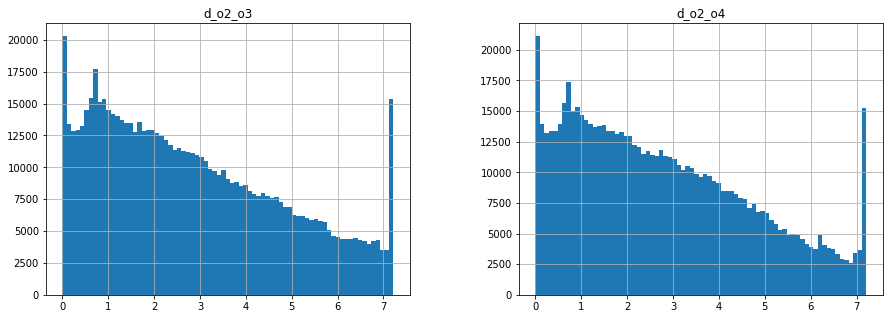

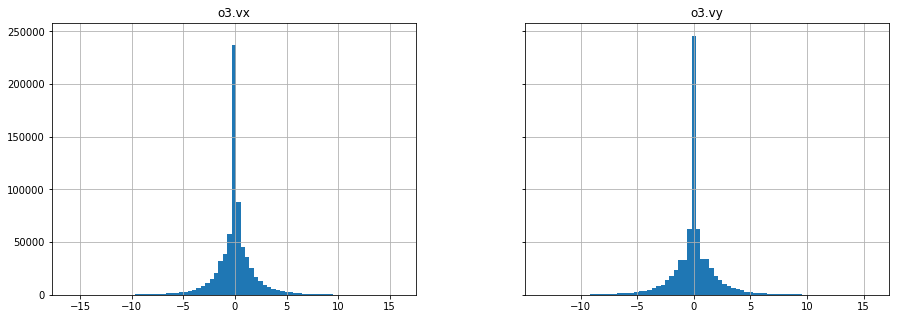

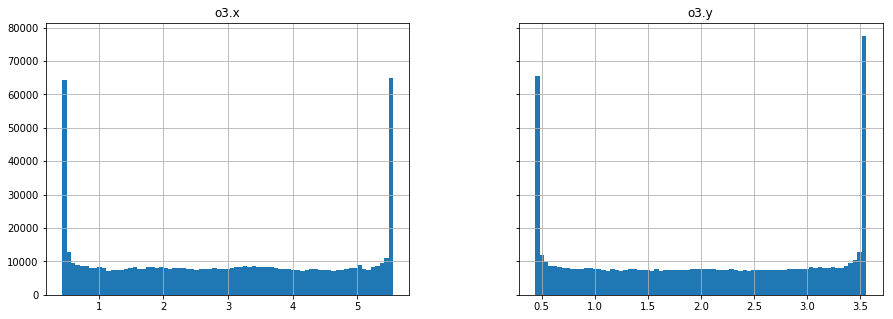

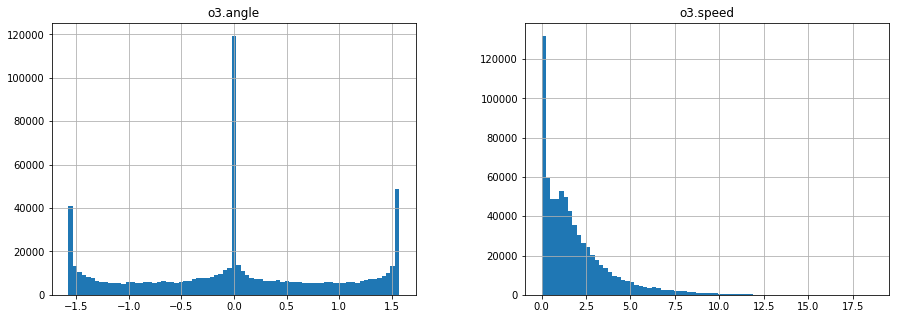

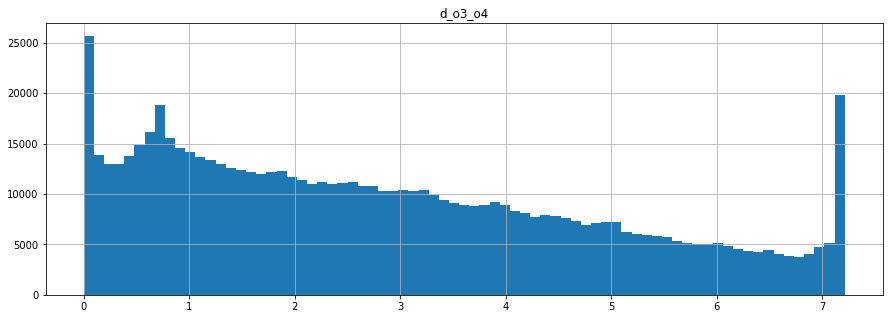

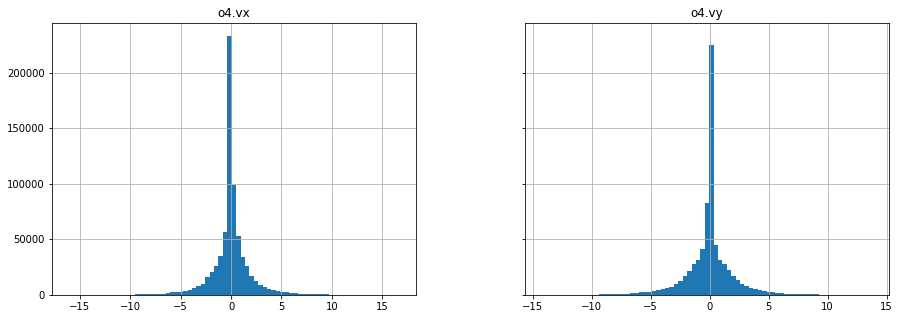

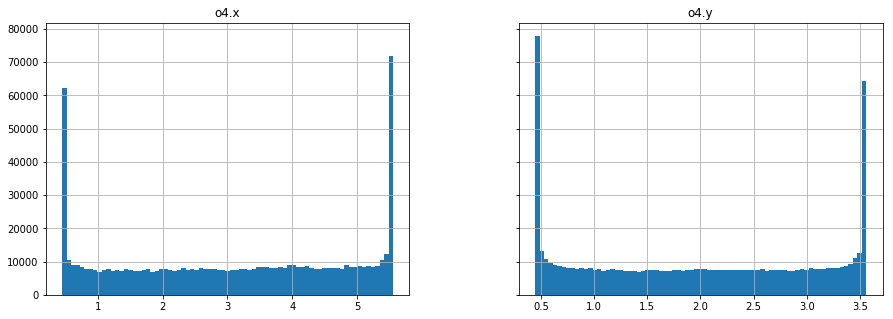

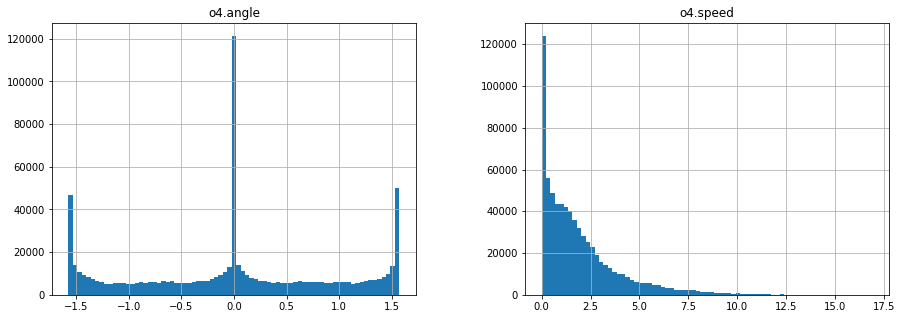

In [11]:
basic_plotting(mass_trials)

In [12]:
exp1_yoked_trials = read_dataset("data/yoked_trials_exp1.h5")

100%|██████████| 143/143 [00:01<00:00, 76.08it/s]


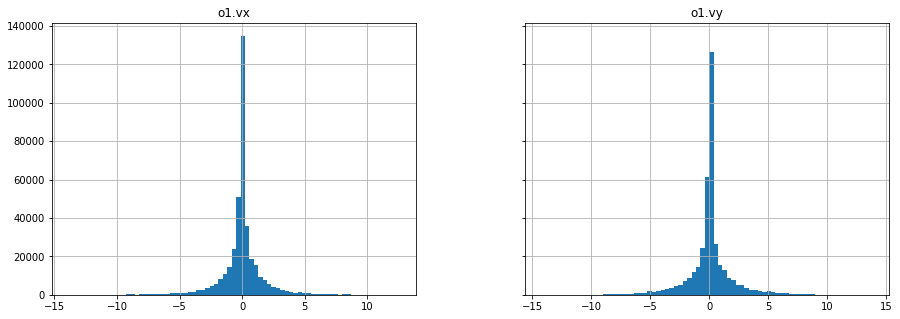

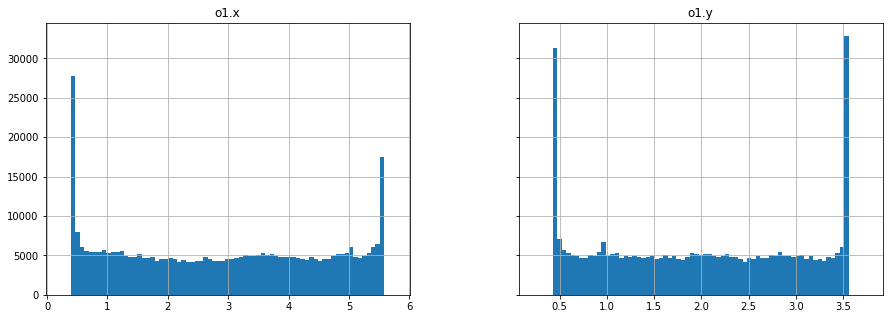

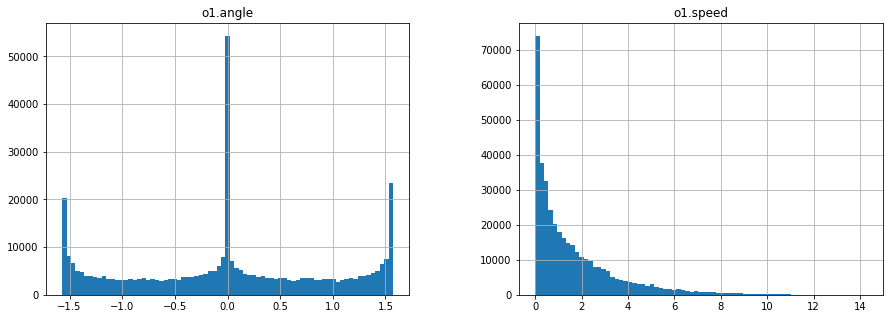

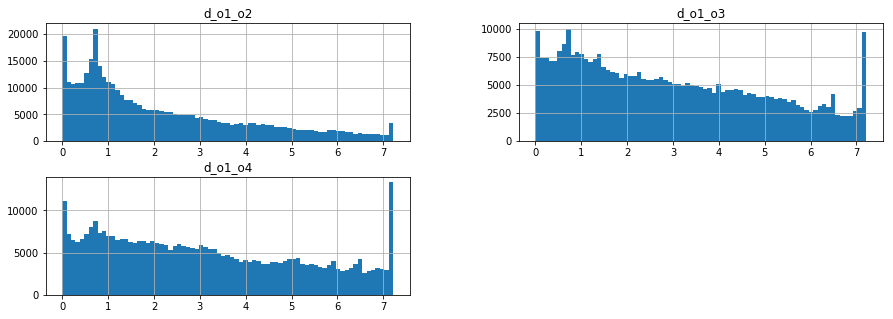

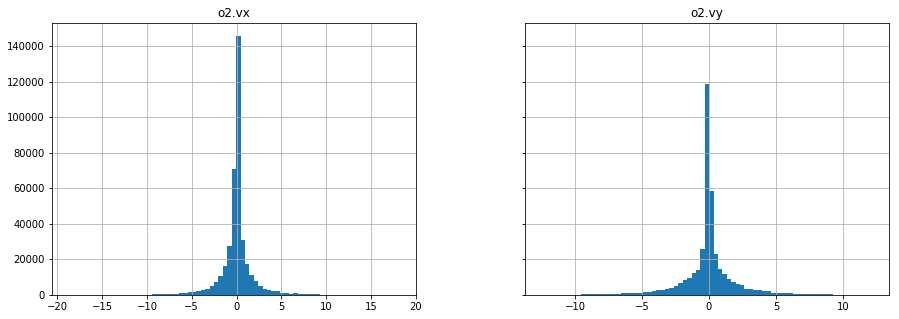

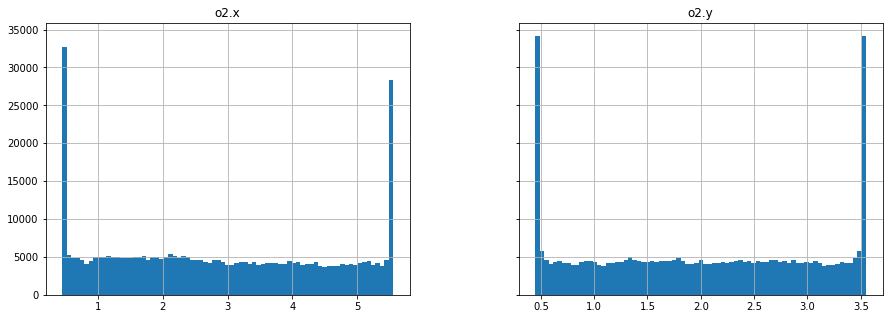

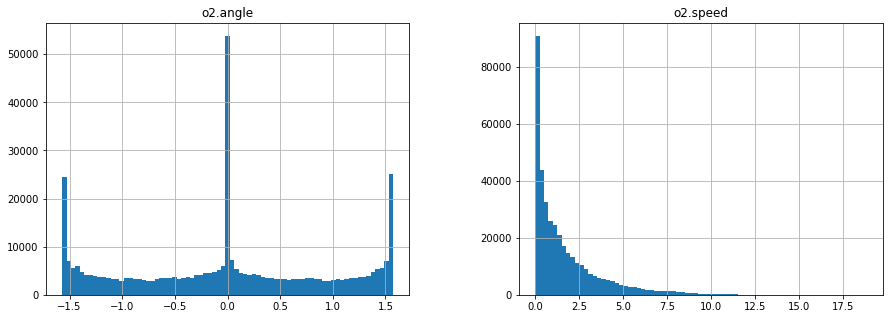

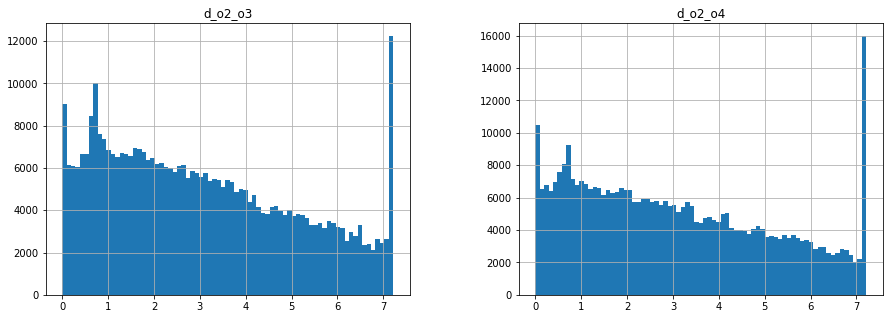

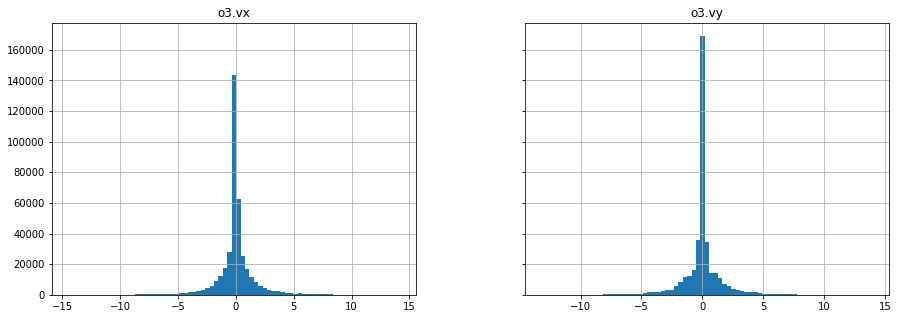

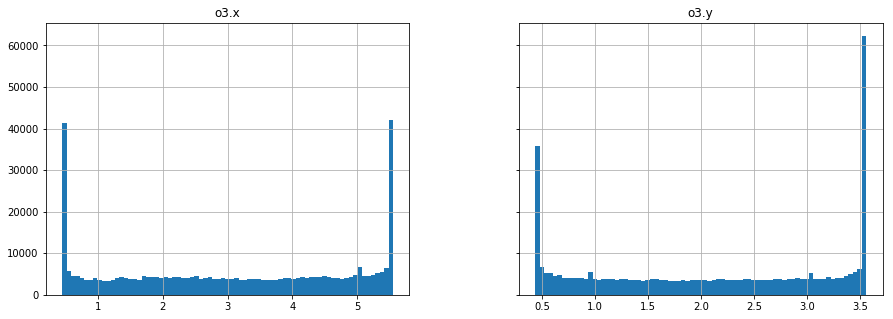

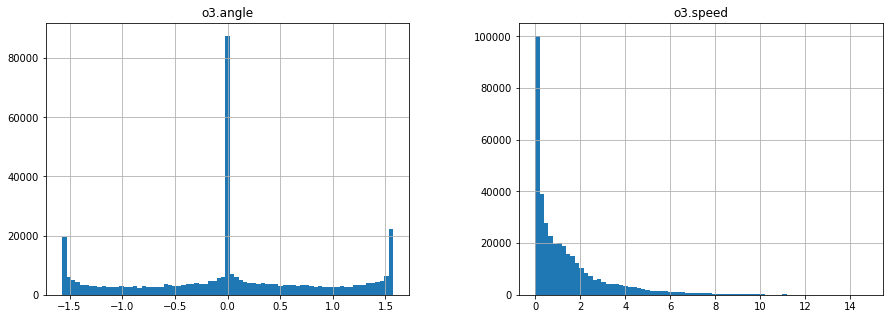

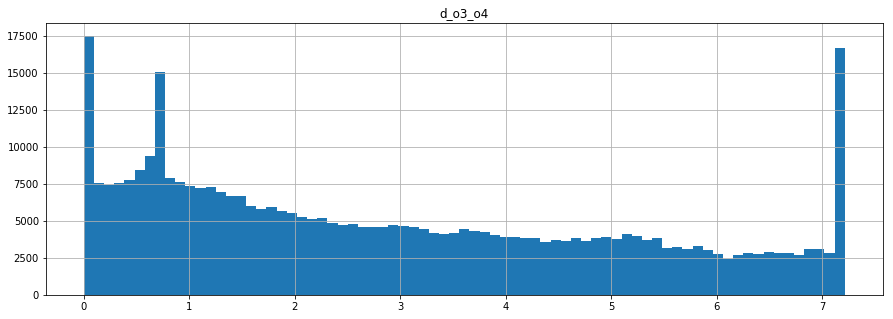

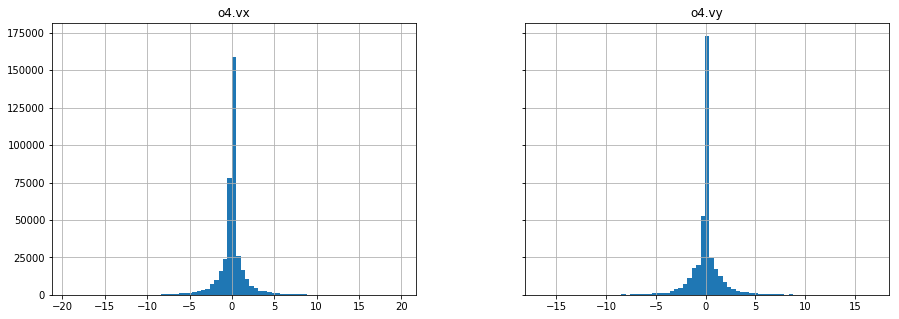

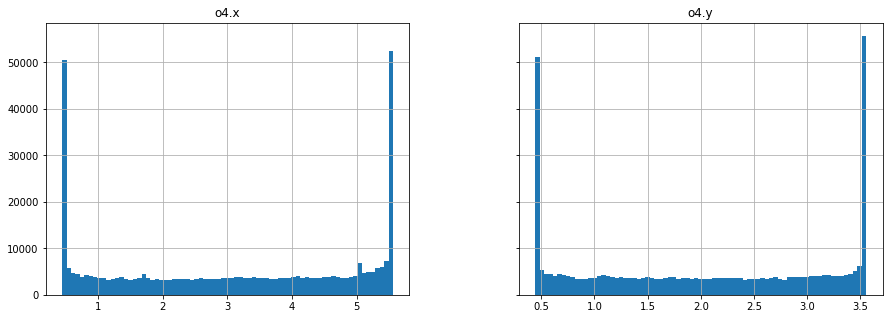

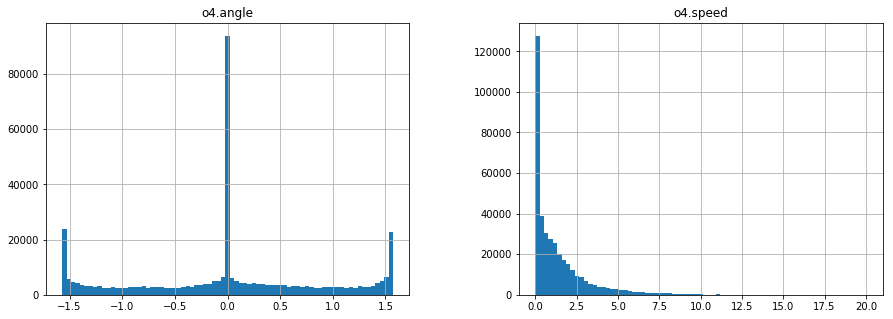

In [13]:
basic_plotting(exp1_yoked_trials)

In [14]:
exp1_passive_trials = read_dataset("data/passive_trials_exp1.h5")

100%|██████████| 196/196 [00:02<00:00, 66.04it/s]


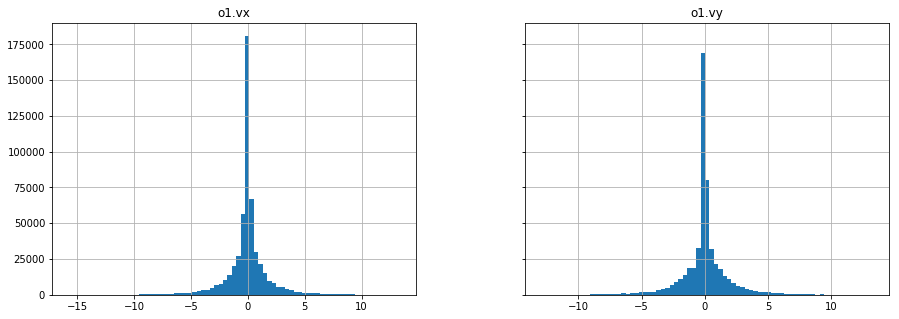

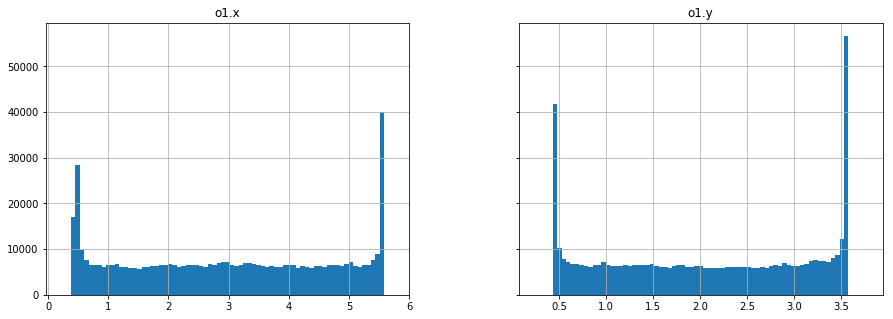

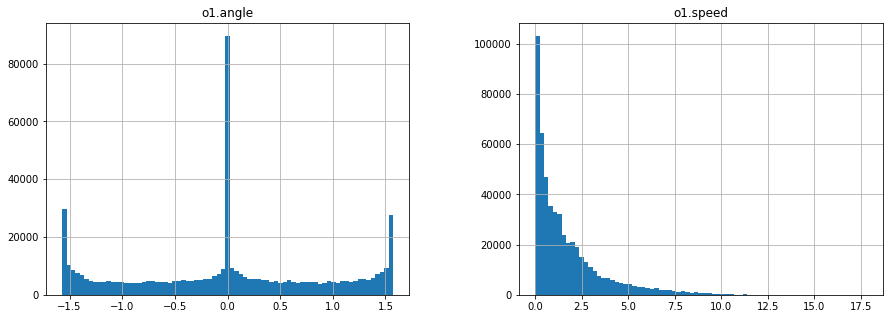

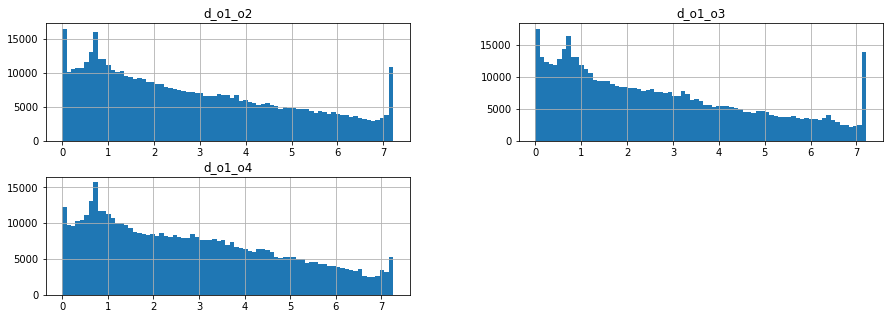

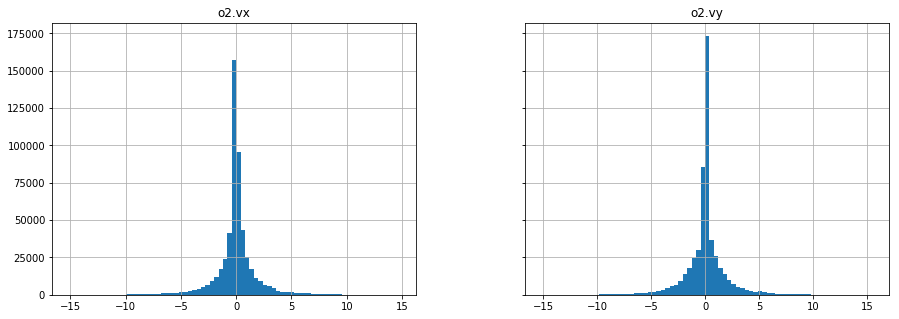

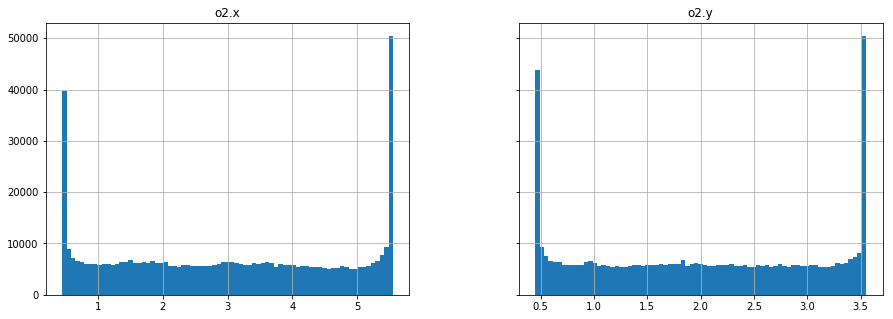

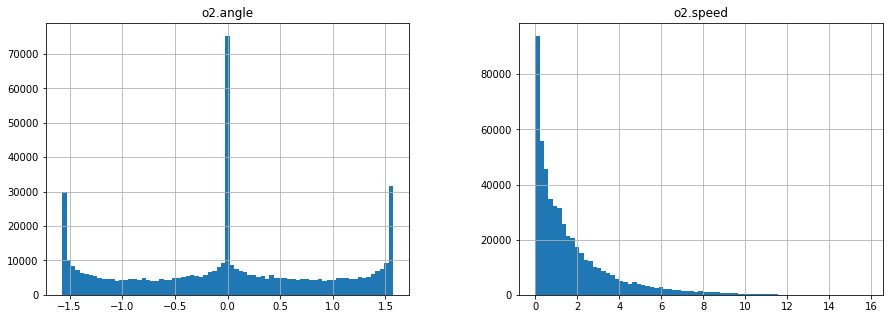

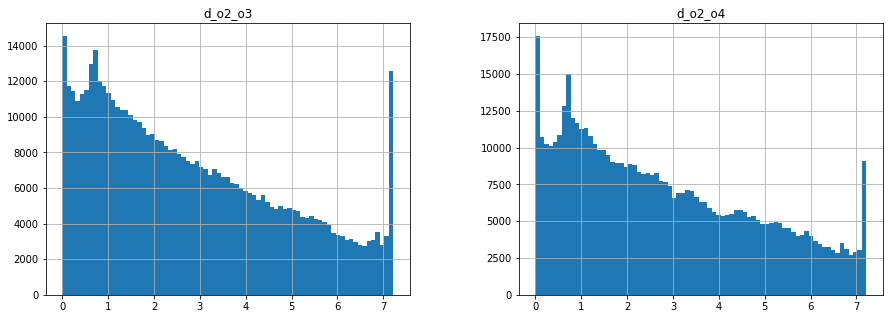

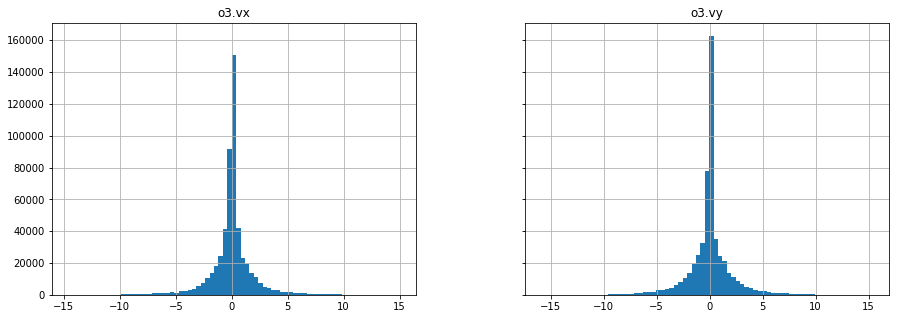

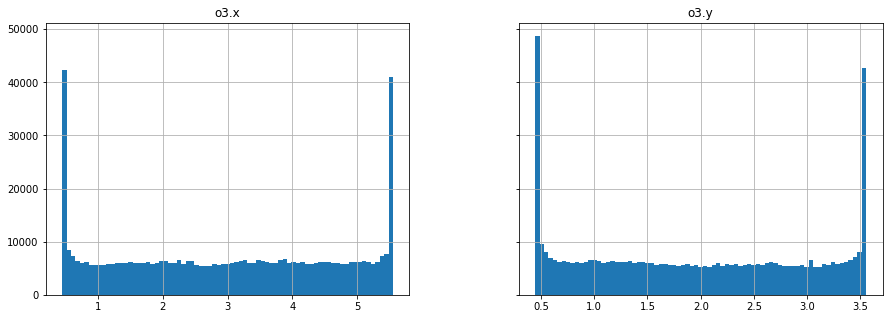

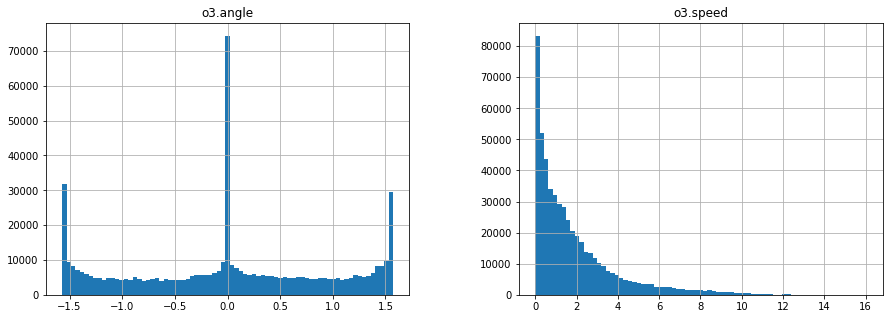

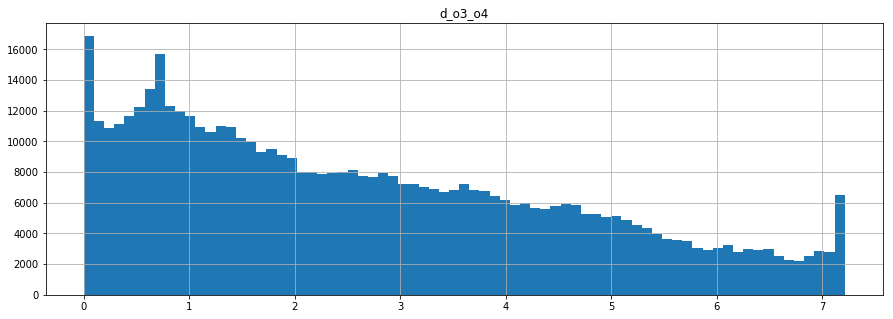

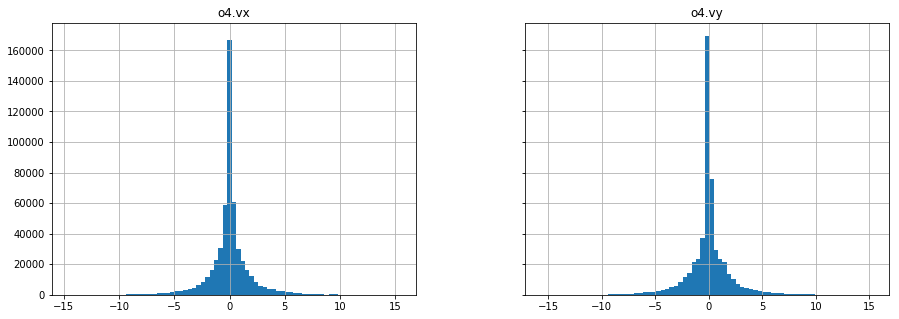

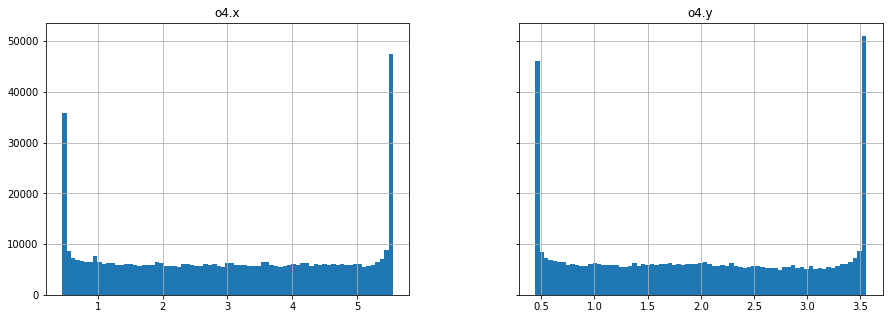

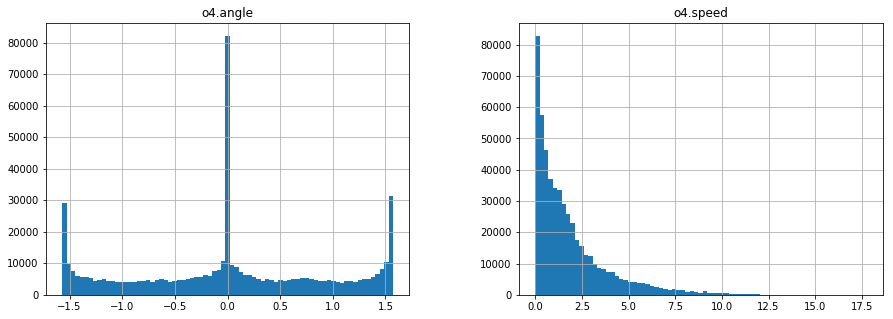

In [15]:
basic_plotting(exp1_passive_trials)

# Heatmaps of mouse locations (ACTIVE DATA)

In [16]:
def get_row_and_col(mouse_data):
    return np.floor(mouse_data / SQUARE_SIZE).astype(int)

def get_grid_heatmap(mouse_data):
    grid_count = mouse_data.groupby(["row", "col"]).size()
        
    sns.heatmap([[grid_count.loc[(row, col)] if grid_count.index.isin([(row, col)]).any() else 0
                   for col in range(NCOLS)] for row in range(NROWS)])
    plt.show()

def get_speed_delta(speed):
    return speed.shift(1).fillna(0) - speed

In [17]:
active_trials = read_dataset("data/mass_trials_exp2.h5")

100%|██████████| 399/399 [00:08<00:00, 46.73it/s]


In [23]:
SQUARE_SIZE = 50
WIDTH = 600
HEIGHT = 400
NROWS = int(np.ceil(HEIGHT / SQUARE_SIZE))
NCOLS = int(np.ceil(WIDTH / SQUARE_SIZE))


for trial in active_trials:
    trials = []

    if list(trial.idControlledObject.unique()) == ["none"]:
        continue

    mouse_data = trial[["mouseX", "mouseY"]].copy()
    mouse_data[["col", "row"]] = get_row_and_col(mouse_data)
    mouse_data[["mouse.vx", "mouse.vy"]] = trial[["mouse.vx", "mouse.vy"]]
    mouse_data["delta_vx"] = get_speed_delta(mouse_data["mouse.vx"])
    mouse_data["delta_vy"] = get_speed_delta(mouse_data["mouse.vy"])

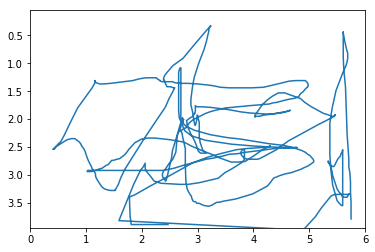

VELOCITY in X


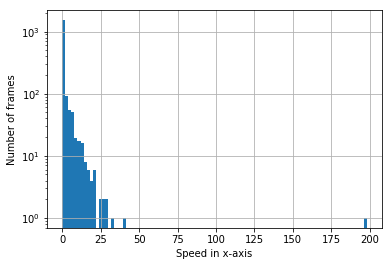

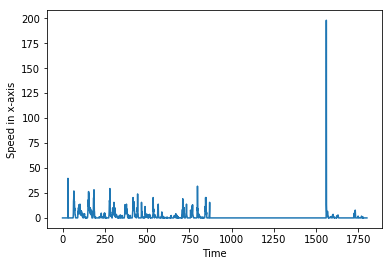

VELOCITY in Y


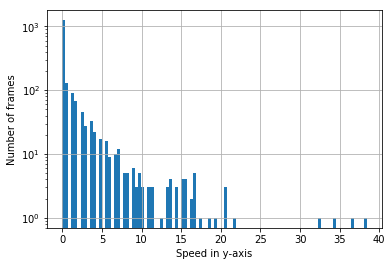

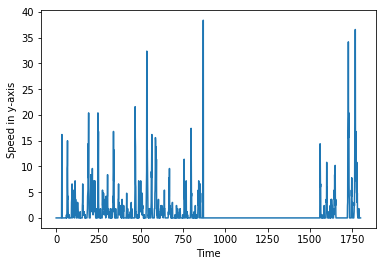

In [35]:
trial = active_trials[5]

plt.axis('equal')
plt.xlim((0, 6))
plt.ylim((0, 4))
plt.gca().invert_yaxis()
plt.plot(trial.mouseX, trial.mouseY)
plt.show()

print("VELOCITY in X")

# vel_x[vel_x != 0] = np.log(vel_x[vel_x != 0])
trial["mouse.vx"].hist(bins=100, log=True)
plt.ylabel("Number of frames")
plt.xlabel("Speed in x-axis")
plt.show()
trial["mouse.vx"].plot()
plt.xlabel("Time")
plt.ylabel("Speed in x-axis")
plt.show()

print("VELOCITY in Y")

# vel_y[vel_y != 0] = np.log(vel_y[vel_y != 0])
trial["mouse.vy"].hist(bins=100, log=True)
plt.ylabel("Number of frames")
plt.xlabel("Speed in y-axis")
plt.show()
trial["mouse.vy"].plot()
plt.xlabel("Time")
plt.ylabel("Speed in y-axis")
plt.show()

# Histogram of pucks being controlled

In [37]:
from isaac.constants import MOUSE_CONTROL_COLS

In [38]:
exp1_trials = read_dataset("data/yoked_trials_exp1.h5")

100%|██████████| 143/143 [00:01<00:00, 86.90it/s]


In [39]:
trials = pd.concat(exp1_trials)

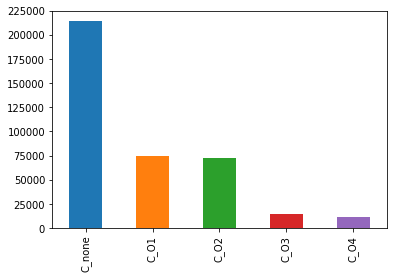

In [40]:
trials[MOUSE_CONTROL_COLS].sum().plot(kind='bar')